In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Regular EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import Scikit Learn Libraries
from sklearn.linear_model import LogisticRegression

# Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

In [ ]:
shank = pd.read_csv('/content/drive/MyDrive/Assessment of VDF/shank2 - shank2.csv', low_memory=False, parse_dates=["Date"])
shank.head()

,S.No,Date,Time,Months,Sample,Gmb,Gmm,Binder Content (%),Density,Gse,Gsb,VMA,VFB,Vbe,VMB,Pba,Pbe,Traffic,"Air Voids, Va"
0,1,2019-09-16,Month 1,1,1,2.339,2.505,5.6,93.4,2.734,2.56,99.09,93.31,92.5,7.1,2.6,3.0,25984,6.6
1,2,2020-09-16,Month 1,1,2,2.338,2.505,5.6,93.3,2.734,2.56,99.95,93.33,93.3,7.1,2.6,3.0,25984,6.7
2,3,2021-09-16,Month 1,1,3,2.309,2.505,4.8,92.2,2.697,2.56,99.93,92.17,92.1,8.5,2.1,2.7,25984,7.8
3,4,2022-09-16,Month 1,1,4,2.321,2.505,4.8,92.7,2.697,2.56,99.91,92.65,92.6,7.9,2.1,2.7,25984,7.3
4,5,2023-09-16,Month 1,1,5,2.294,2.505,5.6,91.6,2.734,2.56,99.88,91.57,91.5,9.2,2.6,3.0,25984,8.4


In [ ]:
shank.shape

(172, 19)

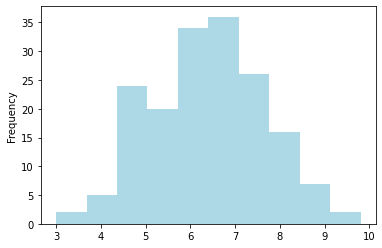

In [ ]:
shank['Air Voids, Va'].plot(kind='hist', color=['lightblue']);

In [ ]:
shank.isna().sum()

S.No                  0
Date                  0
Time                  0
Months                0
Sample                0
Gmb                   0
Gmm                   0
Binder Content (%)    0
Density               0
Gse                   0
Gsb                   0
VMA                   0
VFB                   0
Vbe                   0
VMB                   0
Pba                   0
Pbe                   0
Traffic               0
Air Voids, Va         0
dtype: int64

In [ ]:
shank.describe()

,S.No,Months,Sample,Gmb,Gmm,Binder Content (%),Density,Gse,Gsb,VMA,VFB,Vbe,VMB,Pba,Pbe,Traffic,"Air Voids, Va"
count,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000,172.000000,1.720000e+02,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,86.500000,15.139535,5.383721,2.345331,2.505000e+00,4.870349,99.925000,2.700442,2.560000e+00,99.86750,93.617733,93.494186,6.486628,2.112791,2.758140,413274.802326,6.371512
std,49.796252,9.475315,2.918658,0.031614,4.453858e-16,0.320624,12.674029,0.014641,4.453858e-16,0.09162,1.263167,1.252026,1.553979,0.209034,0.115435,265750.789293,1.259329
min,1.000000,1.000000,1.000000,2.259000,2.505000e+00,4.200000,90.200000,2.671000,2.560000e+00,99.09000,90.190000,90.100000,2.800000,1.700000,2.500000,25984.000000,3.000000
25%,43.750000,5.000000,3.000000,2.324750,2.505000e+00,4.600000,93.075000,2.688000,2.560000e+00,99.81000,92.790000,92.600000,5.300000,1.900000,2.700000,131189.000000,5.500000
50%,86.500000,16.000000,5.000000,2.345000,2.505000e+00,4.800000,94.100000,2.698500,2.560000e+00,99.88000,93.605000,93.500000,6.500000,2.100000,2.750000,431265.000000,6.400000
75%,129.250000,23.000000,8.000000,2.368000,2.505000e+00,5.000000,97.150000,2.706000,2.560000e+00,99.93000,94.517500,94.400000,7.600000,2.200000,2.800000,630739.000000,7.200000
max,172.000000,35.000000,12.000000,2.429000,2.505000e+00,5.800000,139.900000,2.744000,2.560000e+00,99.98000,96.980000,96.900000,10.800000,2.700000,3.100000,988870.000000,9.800000


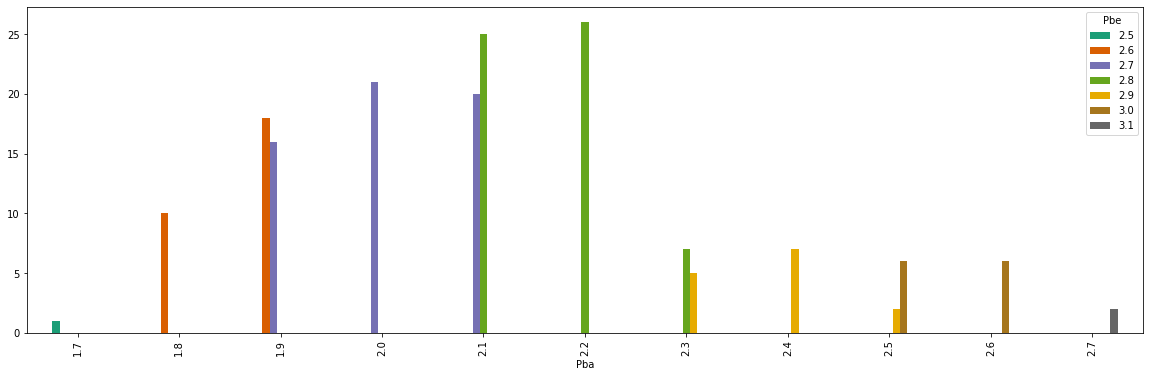

In [ ]:
pd.crosstab(shank['Pba'], shank['Pbe']).plot(kind='bar', figsize=(20,6), cmap='Dark2').set_facecolor("white");

In [ ]:
shank.corr()

,S.No,Months,Sample,Gmb,Gmm,Binder Content (%),Density,Gse,Gsb,VMA,VFB,Vbe,VMB,Pba,Pbe,Traffic,"Air Voids, Va"
S.No,1.000000,0.979527,-0.064741,0.310718,NaN,-0.499988,0.737891,-0.508932,NaN,0.141618,0.311604,0.321887,-0.592702,-0.488158,-0.496162,0.977285,-0.308909
Months,0.979527,1.000000,-0.116135,0.308239,NaN,-0.428851,0.779905,-0.440373,NaN,0.168002,0.309224,0.321764,-0.602165,-0.417508,-0.425026,0.999678,-0.306409
Sample,-0.064741,-0.116135,1.000000,0.168342,NaN,0.104093,-0.061932,0.112334,NaN,-0.678266,0.165219,0.120638,-0.111166,0.120351,0.091348,-0.116017,-0.169637
Gmb,0.310718,0.308239,0.168342,1.000000,NaN,-0.157741,0.172549,-0.165869,NaN,-0.133813,0.999976,0.997253,-0.903564,-0.168959,-0.131585,0.302868,-0.999761
Gmm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Binder Content (%),-0.499988,-0.428851,0.104093,-0.157741,NaN,1.000000,-0.222015,0.998686,NaN,-0.204599,-0.158509,-0.170147,0.255539,0.991676,0.972760,-0.419882,0.157068
Density,0.737891,0.779905,-0.061932,0.172549,NaN,-0.222015,1.000000,-0.227636,NaN,0.074493,0.172923,0.179046,-0.564164,-0.197283,-0.247425,0.793105,-0.172183
Gse,-0.508932,-0.440373,0.112334,-0.165869,NaN,0.998686,-0.227636,1.000000,NaN,-0.211571,-0.166687,-0.178864,0.264340,0.991584,0.973638,-0.431499,0.165079
Gsb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMA,0.141618,0.168002,-0.678266,-0.133813,NaN,-0.204599,0.074493,-0.211571,NaN,1.000000,-0.128992,-0.063750,0.077558,-0.220003,-0.184681,0.166085,0.135872


In [ ]:
shank_1 = shank.drop('S.No', axis=1)

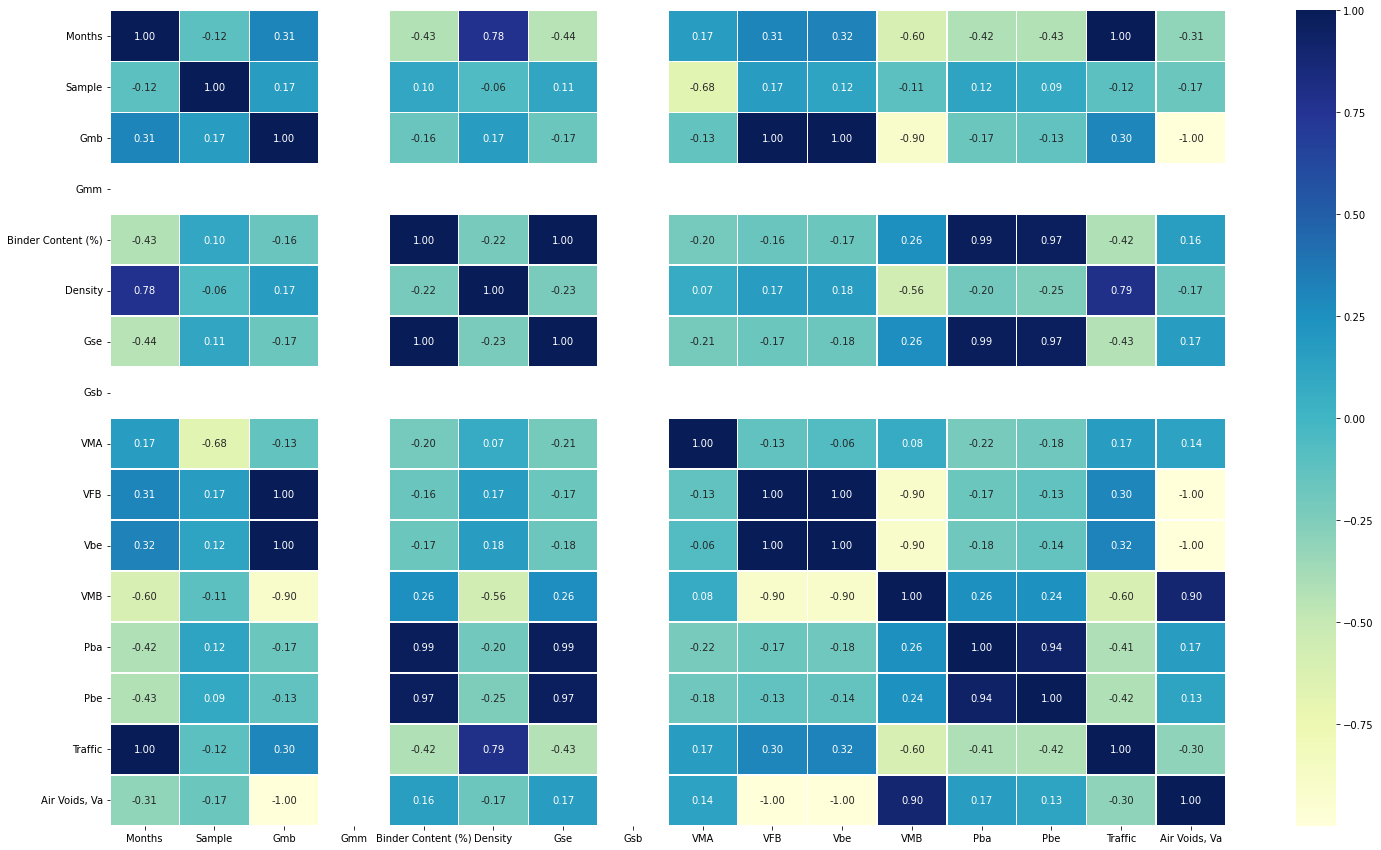

In [ ]:


corr_matrix = shank_1.corr()
fig, ax = plt.subplots(figsize=(25,15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=.5,
                 fmt='.2f',
                 cmap='YlGnBu')

bottom, top = ax.get_ylim()

## Coverting "Date" which is a string into its own columns that show day, month and year as integers

In [ ]:
shank_1['year'] = shank_1.Date.dt.year
shank_1['month'] = shank_1.Date.dt.month
shank_1['day'] = shank_1.Date.dt.day
shank_1['DayofWeek'] = shank_1.Date.dt.dayofweek
shank_1['Dayofyear'] = shank_1.Date.dt.dayofyear

### Modelling or Experimenting with the data

## Trying out the best model there is "RandomForestRegressor"

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics

In [ ]:
Reg = RandomForestRegressor(
    n_estimators = 100
)

In [ ]:
X = shank_1.drop("Air Voids, Va", axis = 1)[:150]
y = shank_1["Air Voids, Va"][:150]

X.shape, y.shape

((150, 22), (150,))

Check for missing data

In [ ]:
X.isna().sum()

Date                  0
Time                  0
Months                0
Sample                0
Gmb                   0
Gmm                   0
Binder Content (%)    0
Density               0
Gse                   0
Gsb                   0
VMA                   0
VFB                   0
Vbe                   0
VMB                   0
Pba                   0
Pbe                   0
Traffic               0
year                  0
month                 0
day                   0
DayofWeek             0
Dayofyear             0
dtype: int64

In [ ]:
y.isna().sum()

0

Converting the dates into day, month, year

In [ ]:
X.drop("Date", axis=1, inplace=True)

In [ ]:
X.head().T

,0,1,2,3,4
Time,Month 1,Month 1,Month 1,Month 1,Month 1
Months,1,1,1,1,1
Sample,1,2,3,4,5
Gmb,2.339,2.338,2.309,2.321,2.294
Gmm,2.505,2.505,2.505,2.505,2.505
Binder Content (%),5.6,5.6,4.8,4.8,5.6
Density,93.4,93.3,92.2,92.7,91.6
Gse,2.734,2.734,2.697,2.697,2.734
Gsb,2.56,2.56,2.56,2.56,2.56
VMA,99.09,99.95,99.93,99.91,99.88


In [ ]:
X.drop("Time", axis=1, inplace=True)

In [ ]:
Reg.fit(X,y)

RandomForestRegressor()

In [ ]:
print(f"the R2 score is\t{Reg.score(X, y)}")

the R2 score is	0.998892483062972


# the R2 score is	0.9990544521070471

In [ ]:
Reg_preds = Reg.predict(X)

In [ ]:
Reg_preds

array([6.652, 6.691, 7.8  , 7.312, 8.396, 8.388, 8.25 , 5.935, 7.806,
       7.414, 7.389, 7.002, 8.803, 8.704, 8.631, 8.704, 8.719, 8.867,
       7.004, 6.5  , 7.191, 7.194, 6.302, 5.611, 7.485, 6.801, 8.409,
       5.782, 6.919, 4.224, 8.343, 7.7  , 7.795, 6.608, 7.509, 7.613,
       6.096, 7.868, 5.079, 4.466, 5.002, 5.002, 6.196, 5.315, 6.803,
       6.803, 7.798, 6.911, 6.098, 6.402, 7.7  , 6.703, 7.121, 6.1  ,
       7.294, 7.003, 6.503, 6.8  , 5.597, 4.807, 5.007, 6.094, 4.813,
       5.589, 6.397, 6.212, 6.799, 7.103, 5.897, 5.601, 5.806, 6.098,
       4.997, 5.55 , 4.065, 5.896, 4.921, 7.298, 7.099, 7.226, 5.805,
       7.796, 5.002, 5.001, 5.705, 7.089, 5.899, 7.3  , 9.593, 4.795,
       5.   , 5.436, 3.516, 5.716, 6.698, 7.102, 5.9  , 6.498, 5.189,
       4.482, 6.403, 5.323, 7.806, 8.142, 4.483, 4.688, 7.493, 6.697,
       5.105, 6.697, 4.18 , 6.191, 6.296, 5.908, 4.608, 6.496, 6.288,
       6.096, 5.897, 5.187, 6.1  , 6.7  , 6.301, 6.405, 5.801, 6.1  ,
       8.282, 6.448,

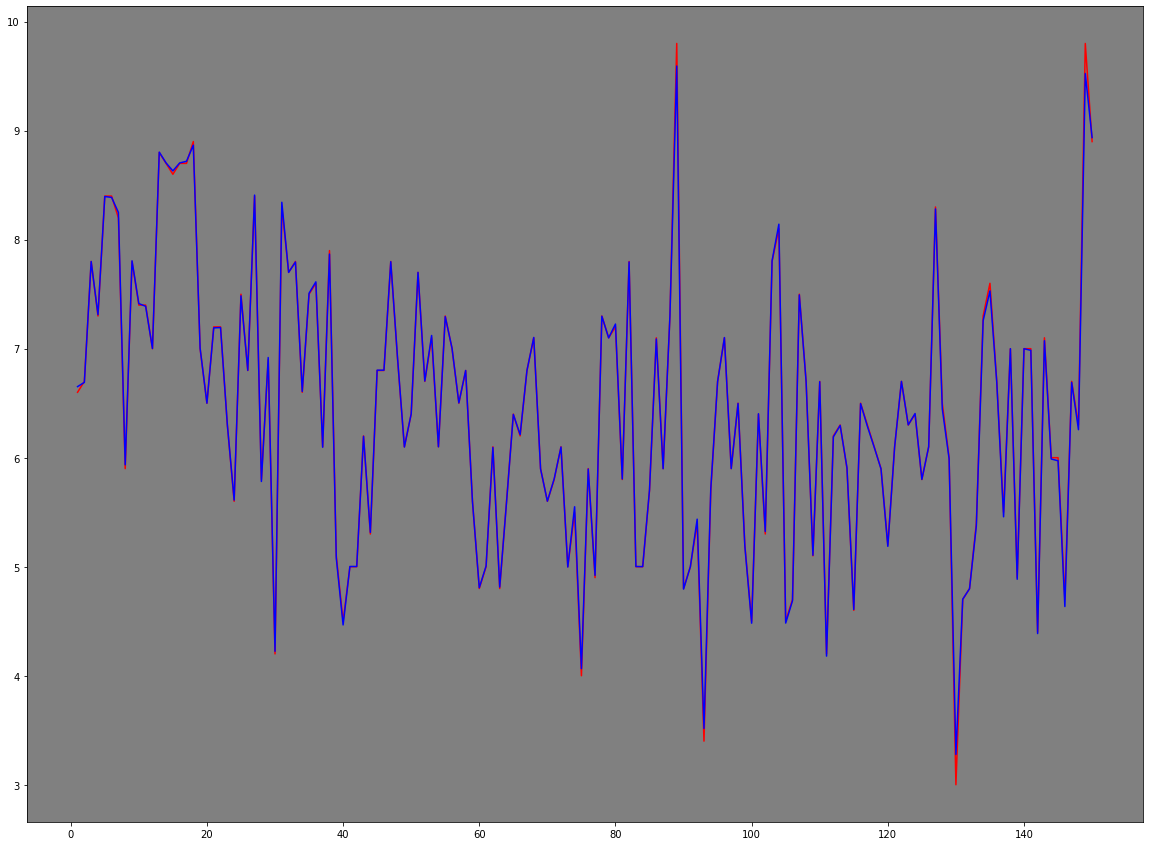

In [ ]:
X_plot = shank["S.No"][:150]
y_plot = shank["Air Voids, Va"][:150]


plt.figure(figsize=(20,15));

ax = plt.axes()
ax.set_facecolor("grey")

plt.plot(X_plot, y_plot, color="red");
plt.plot(X_plot, Reg_preds, color="blue");

# the grey bg is to help see the red better

In [ ]:
shank_1.head(15)

,Date,Time,Months,Sample,Gmb,Gmm,Binder Content (%),Density,Gse,Gsb,...,VMB,Pba,Pbe,Traffic,"Air Voids, Va",year,month,day,DayofWeek,Dayofyear
0,2019-09-16,Month 1,1,1,2.339,2.505,5.6,93.4,2.734,2.56,...,7.1,2.6,3.0,25984,6.6,2019,9,16,0,259
1,2020-09-16,Month 1,1,2,2.338,2.505,5.6,93.3,2.734,2.56,...,7.1,2.6,3.0,25984,6.7,2020,9,16,2,260
2,2021-09-16,Month 1,1,3,2.309,2.505,4.8,92.2,2.697,2.56,...,8.5,2.1,2.7,25984,7.8,2021,9,16,3,259
3,2022-09-16,Month 1,1,4,2.321,2.505,4.8,92.7,2.697,2.56,...,7.9,2.1,2.7,25984,7.3,2022,9,16,4,259
4,2023-09-16,Month 1,1,5,2.294,2.505,5.6,91.6,2.734,2.56,...,9.2,2.6,3.0,25984,8.4,2023,9,16,5,259
5,2024-09-16,Month 1,1,6,2.295,2.505,5.6,91.6,2.734,2.56,...,9.2,2.6,3.0,25984,8.4,2024,9,16,0,260
6,2025-09-16,Month 1,1,7,2.299,2.505,5.3,91.8,2.720,2.56,...,9.0,2.4,2.9,25984,8.2,2025,9,16,1,259
7,2026-09-16,Month 1,1,8,2.356,2.505,5.3,94.1,2.720,2.56,...,6.3,2.4,2.9,25984,5.9,2026,9,16,2,259
8,2027-09-16,Month 1,1,9,2.309,2.505,5.8,92.2,2.744,2.56,...,8.5,2.7,3.1,25984,7.8,2027,9,16,3,259
9,2028-09-16,Month 1,1,10,2.319,2.505,5.8,92.6,2.744,2.56,...,8.0,2.7,3.1,25984,7.4,2028,9,16,5,260


In [ ]:
X.head()

,Months,Sample,Gmb,Gmm,Binder Content (%),Density,Gse,Gsb,VMA,VFB,Vbe,VMB,Pba,Pbe,Traffic,year,month,day,DayofWeek,Dayofyear
0,1,1,2.339,2.505,5.6,93.4,2.734,2.56,99.09,93.31,92.5,7.1,2.6,3.0,25984,2019,9,16,0,259
1,1,2,2.338,2.505,5.6,93.3,2.734,2.56,99.95,93.33,93.3,7.1,2.6,3.0,25984,2020,9,16,2,260
2,1,3,2.309,2.505,4.8,92.2,2.697,2.56,99.93,92.17,92.1,8.5,2.1,2.7,25984,2021,9,16,3,259
3,1,4,2.321,2.505,4.8,92.7,2.697,2.56,99.91,92.65,92.6,7.9,2.1,2.7,25984,2022,9,16,4,259
4,1,5,2.294,2.505,5.6,91.6,2.734,2.56,99.88,91.57,91.5,9.2,2.6,3.0,25984,2023,9,16,5,259


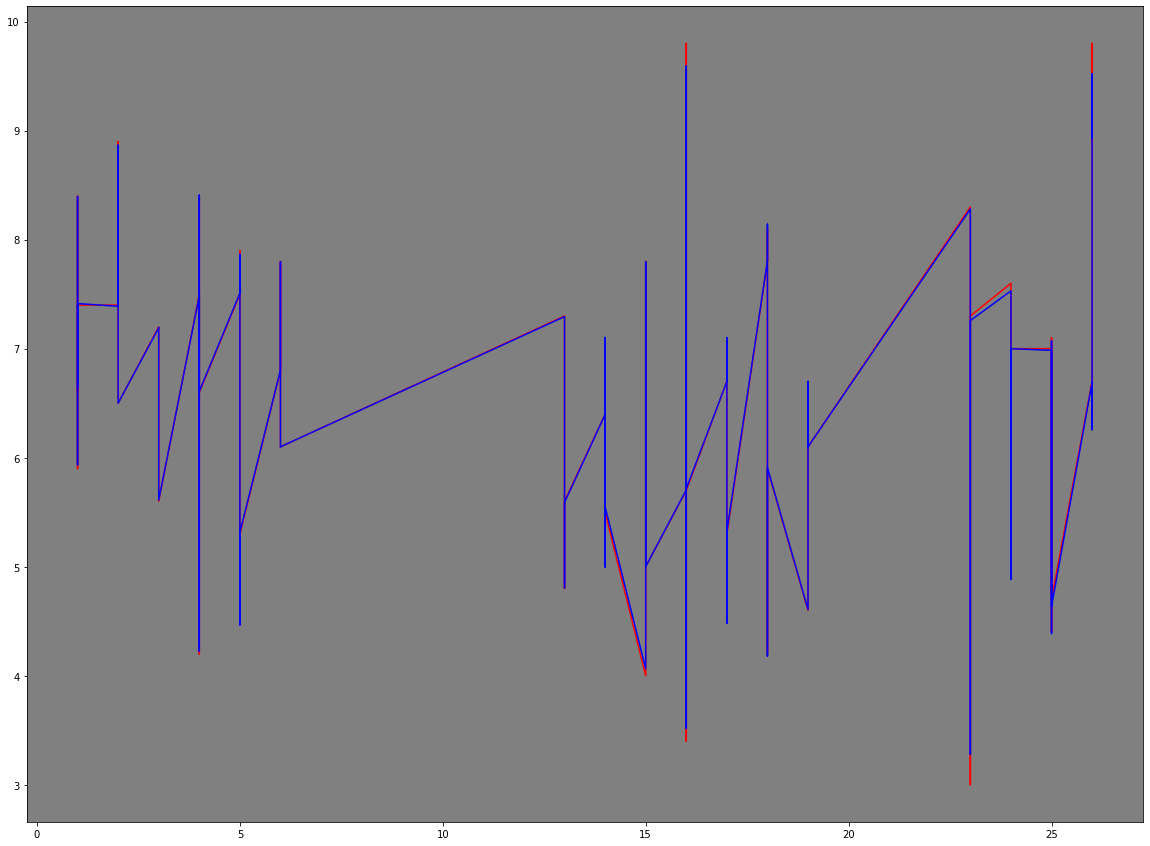

In [ ]:
X_plot = shank["Months"][:150]
y_plot = shank["Air Voids, Va"][:150]


plt.figure(figsize=(20,15));

ax = plt.axes()
ax.set_facecolor("grey")

plt.plot(X_plot, y_plot, color="red");
plt.plot(X_plot, Reg_preds, color="blue");


In [ ]:
X_test1 = shank_1.drop("Date", axis=1)[150:]
X_test1 = X_test1.drop("Time", axis=1)
X_test1 = X_test1.drop("Air Voids, Va", axis=1)

In [ ]:
X_test1.head()

,Months,Sample,Gmb,Gmm,Binder Content (%),Density,Gse,Gsb,VMA,VFB,Vbe,VMB,Pba,Pbe,Traffic,year,month,day,DayofWeek,Dayofyear
150,26,5,2.347,2.505,4.5,118.9,2.684,2.56,99.88,93.69,93.6,5.3,1.9,2.6,718325,2021,10,26,1,299
151,26,6,2.357,2.505,4.5,119.9,2.684,2.56,99.86,94.08,93.9,4.9,1.9,2.6,718325,2021,10,27,2,300
152,26,7,2.336,2.505,4.5,120.9,2.684,2.56,99.83,93.24,93.1,5.6,1.9,2.6,718325,2021,10,28,3,301
153,26,8,2.322,2.505,4.5,121.9,2.684,2.56,99.81,92.66,92.5,6.0,1.9,2.6,718325,2021,10,29,4,302
154,27,1,2.324,2.505,4.6,122.9,2.687,2.56,99.98,92.76,92.7,5.9,1.9,2.7,747805,2021,11,26,4,330


In [ ]:

y_test1 = Reg.predict(X_test1)
y_test1

array([6.254, 5.88 , 6.745, 7.268, 7.187, 7.443, 4.464, 6.342, 5.457,
       5.133, 6.059, 3.951, 3.553, 6.44 , 4.589, 7.65 , 6.352, 6.041,
       4.576, 5.088, 5.149, 7.647])

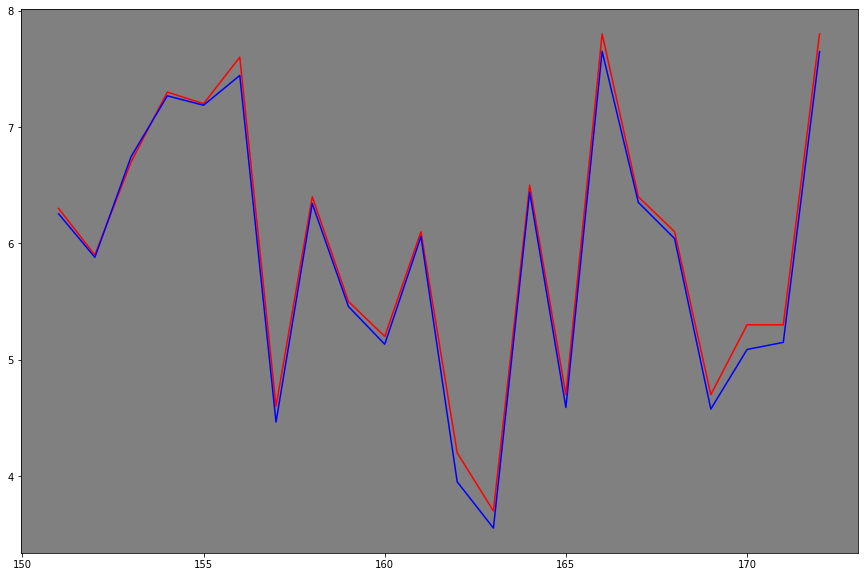

In [ ]:
X_plot = shank["S.No"][150:]
y_plot = shank["Air Voids, Va"][150:]


plt.figure(figsize=(15,10));

ax = plt.axes()
ax.set_facecolor("grey")

plt.plot(X_plot, y_plot, color="red");
plt.plot(X_plot, y_test1, color="blue");

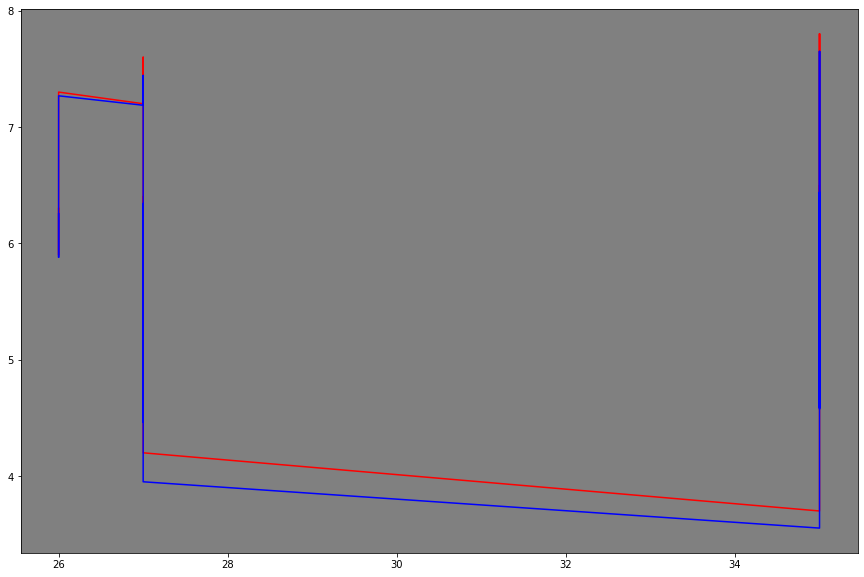

In [ ]:
X_plot = shank["Months"][150:]
y_plot = shank["Air Voids, Va"][150:]


plt.figure(figsize=(15,10));

ax = plt.axes()
ax.set_facecolor("grey")

plt.plot(X_plot, y_plot, color="red");
plt.plot(X_plot, y_test1, color="blue");

## Since RandomForestRegressor Requires a lot of input parameters, more than what can be provided, Lets try out the "ARIMA Family of Models"

###[Choosing the right Model](https://neptune.ai/blog/select-model-for-time-series-prediction-task#:~:text=models%20in%20depth.-,ARIMA%20family,-The%20ARIMA%20family)


## The available options would be:
1. Autoregression (AR)
2. Moving average (MA)
3. Autoregressive moving average (ARMA)
4. Autoregressive integrated moving average (ARIMA)
5. Seasonal autoregressive integrated moving-average (SARIMA)


